#Machine Learning

**Machine Learning (ML)** is a branch of Artificial Intelligence (AI) that enables computers to learn patterns from data and make predictions or decisions without being explicitly programmed.

*Instead of writing rules for every situation, we give a computer data and let it figure out the rules by itself.*

# Types of Machine Learning

 ➤ Supervised Learning:

Trained on a labeled dataset.
It’s like learning with a teacher who gives you both the questions and the correct answers.
You’re shown input-output pairs, and your job is to learn the pattern between them.

➤ Unsupervised Learning

Learning from data without labels.

Imagine being thrown into a room full of strangers and asked to group them , with zero context.
That’s unsupervised learning. No labels. Just raw data.
The model finds hidden patterns on its own.

➤ Semi-Supervised Learning

A mix of labeled and unlabeled data.

It’s like solving a puzzle where only a few pieces have clues ,the rest, you figure out by connecting the dots.
This is useful when labeling data is expensive or time-consuming.

➤ Reinforcement Learning

Learning by trial and error with rewards.

My favorite.
The model learns by doing: it interacts with an environment, makes decisions, and learns from rewards or penalties.
Just like how we learn ,try, fail, improve, repeat.


# Supervised Learning

Supervised Learning is all about learning from labeled data predicting outcomes based on past examples.
In supervised Learning we have to solve two kind of Probelems.


1.   **Regression:**

2.  **Classification:**



# Regression
When we are dealing with supervised learning and the goal is to predict a **continuous value**, regression is our go-to tool.

Let’s break down the most common types:

*  **Simple Linear Regression:**

One input, one output.
It models the relationship between a single independent variable (X) and a dependent variable (Y) using a straight line.
*   **Multiple Linear Regression**

More inputs, one output.
It extends simple linear regression to include multiple independent variables.

*   **Polynomial Regression**

Still one output, but the relationship is non-linear.
Polynomial regression fits a curved line to the data by introducing polynomial terms (X², X³, etc.)

*   **Ordinary Least Squares (OLS):**

After training our goal is to minimize the error so we use. it’s a method used to estimate the best-fit line in linear regression.

*Minimize the sum of squared differences between predicted and actual values.*

#  Linear Regression with single varaible

In [100]:
import pandas as pd
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import load_iris

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import log_loss,classification_report,confusion_matrix,accuracy_score
from sklearn.datasets import make_blobs,load_breast_cancer,fetch_california_housing
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score ,davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pandas as pd
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df=pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
X=df['FUELCONSUMPTION_COMB_MPG']
y=df['CO2EMISSIONS']

Text(0, 0.5, 'CO2EMISSIONS')

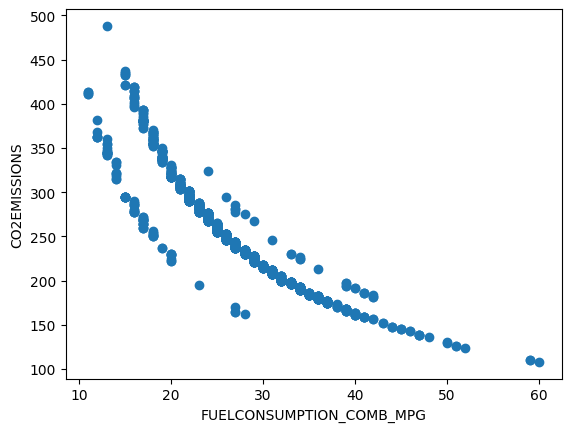

In [6]:
#visulize both data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')


In [7]:
#create a train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((853,), (214,), (853,), (214,))

In [8]:
Regression_model=LinearRegression()
Regression_model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [9]:
#make predictions
linear_prediction=Regression_model.predict(X_test.values.reshape(-1,1))


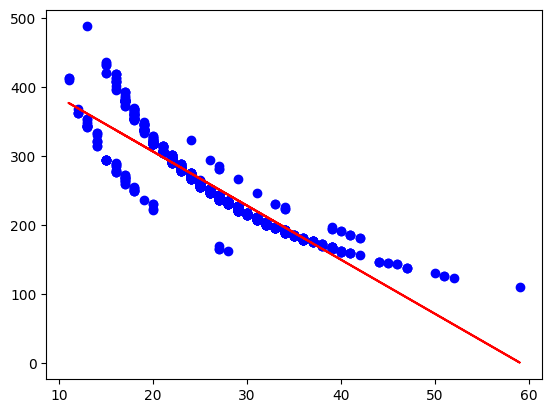

In [10]:
#plot result
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,Regression_model.predict(X_train.values.reshape(-1,1)),color='red')

In [11]:
#measure error
Regresion_error=mean_squared_error(y_test,linear_prediction)
print(f"Linear Regression error is {Regresion_error}")

Linear Regression error is 776.2148620250543


# Linear Regression with single varaible

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [13]:
#drop categorical Column
df=df.drop(['MODELYEAR','MAKE', 'MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'],axis=1)

In [14]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [15]:
df=df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'],axis=1)

In [16]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


In [17]:
X=df[['ENGINESIZE','FUELCONSUMPTION_COMB_MPG']]
y=df['CO2EMISSIONS']

In [18]:
#scale the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [19]:
#create a train test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [20]:
regrisson_model=LinearRegression()
regrisson_model.fit(X_train,y_train)

LinearRegression()

In [21]:
prediction=regrisson_model.predict(X_test)
prediction[:5]

array([307.75418265, 246.20424407, 283.09521026, 237.27517562,
       209.38699514])

In [23]:
error=mean_squared_error(y_test,prediction)
print(f"Linear Regression error is {error}")

Linear Regression error is 466.11311996611664


# Polynomial Regression

In [27]:
df.columns

Index(['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'], dtype='object')

In [29]:
X = df[['FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [30]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [32]:
# Create and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions
poly_prediction = poly_model.predict(X_test)

In [34]:
# Measure the error (Mean Squared Error)
poly_error = mean_squared_error(y_test, poly_prediction)
print(f"Polynomial Regression error is {poly_error}")


Polynomial Regression error is 556.3722397866259


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


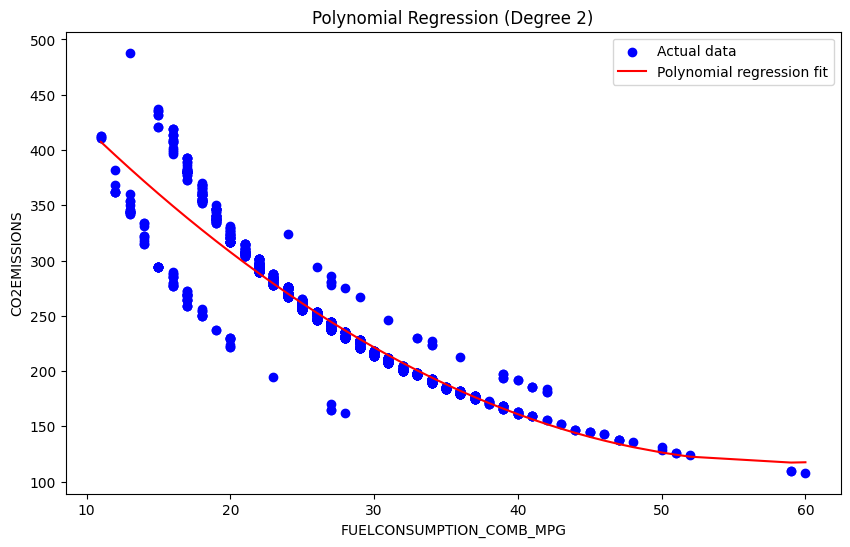

In [36]:
# Visualize the polynomial regression
# We need to sort the data to plot the curve correctly
X_plot, y_plot = zip(*sorted(zip(X['FUELCONSUMPTION_COMB_MPG'], y)))
X_plot = np.array(X_plot).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X['FUELCONSUMPTION_COMB_MPG'], y, color='blue', label='Actual data')
plt.plot(X_plot, poly_model.predict(X_plot_poly), color='red', label='Polynomial regression fit')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

# Classification

Classification models are used when the output is a category or class.

 Here's an overview of the most commonly used types:


*   **Logistic Regression**

It models the probability that an input belongs to a class.
*   **Decision Tree**

A tree-like structure that splits data based on feature values.
Simple, interpretable, but can overfit.



*    ***Random Forest***

An ensemble of decision trees. Combines their results for better accuracy and robustness.
*    **Support Vector Machine (SVM)**

Finds the best boundary (hyperplane) to separate classes in high-dimensional space. Works well with small to medium-sized datasets.


*   **KNN**

Classifies a new point based on the majority label of its k nearest neighbors. No training phase, just comparison.
*   **Naive Bayes**

Based on Bayes’ Theorem and assumes features are independent. Surprisingly powerful for text data.



*   **Neural Networks**

Flexible, multi-layered models that can learn complex decision boundaries. Great for large datasets and deep learning applications.



# Logistic Regression

In [45]:
# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [46]:
#seleect column with high corelation with output
corelation_output=churn_df.corr()['churn']
corelation_output


,churn
tenure,-0.376860
age,-0.287697
address,-0.260659
income,-0.090790
ed,0.216112
employ,-0.337969
equip,0.275284
callcard,-0.311451
wireless,0.174356
longmon,-0.292026


In [47]:
high_correlation_columns = corelation_output[abs(corelation_output) > 0.3].index.tolist()

# Filter the DataFrame to include only the high correlation columns and the target column
churn_df_filtered = churn_df[high_correlation_columns]

print("Columns with high correlation with 'churn':")
print(high_correlation_columns)


Columns with high correlation with 'churn':
['tenure', 'employ', 'callcard', 'loglong', 'churn']


In [48]:
X=churn_df_filtered[['tenure', 'employ', 'callcard', 'loglong']]
y=churn_df_filtered['churn']

In [49]:
#create a train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [51]:
regroessor=LogisticRegression()
regroessor.fit(X_train_scaled,y_train)

LogisticRegression()

In [52]:
regression_probs=regroessor.predict_proba(X_test)
regression_probs[:5]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[9.98577904e-01, 1.42209595e-03],
       [9.99292958e-01, 7.07042155e-04],
       [9.99999417e-01, 5.83395099e-07],
       [9.99999992e-01, 8.49425786e-09],
       [9.99999793e-01, 2.07080706e-07]])

In [53]:
#print accuracy
print("Accuracy:", accuracy_score(y_test,regroessor.predict(X_test_scaled)))
print("Classification Report:\n", classification_report(y_test, regroessor.predict(X_test_scaled)))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84        31
         1.0       0.43      0.33      0.38         9

    accuracy                           0.75        40
   macro avg       0.62      0.60      0.61        40
weighted avg       0.73      0.75      0.74        40



# Descion Tree

In [19]:
import kagglehub
import shutil
import os

# Step 1: Download dataset using kagglehub
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
print("Path to dataset files:", path)

# Step 2: Create a destination directory if not exists
destination_dir = "/content/loan_dataset"
os.makedirs(destination_dir, exist_ok=True)

# Step 3: Copy downloaded files to /content/loan_dataset
shutil.copytree(path, destination_dir, dirs_exist_ok=True)
print("Dataset saved to:", destination_dir)


Path to dataset files: /kaggle/input/loan-approval-prediction-dataset
Dataset saved to: /content/loan_dataset


In [21]:
import pandas as pd
loan_df=pd.read_csv('/content/loan_dataset/loan_approval_dataset.csv')
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [24]:
print(loan_df[' loan_status'].unique())
print(loan_df[' education'].unique())
print(loan_df[' self_employed'].unique())

[' Approved' ' Rejected']
[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [9]:
loan_df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [25]:
# Transform categorical columns into numerical (0 or 1)
loan_df[' loan_status'] = loan_df[' loan_status'].apply(lambda x: 1 if x.strip() == 'Approved' else 0)
loan_df[' education'] = loan_df[' education'].apply(lambda x: 1 if x.strip() == 'Graduate' else 0)
loan_df[' self_employed'] = loan_df[' self_employed'].apply(lambda x: 1 if x.strip() == 'Yes' else 0)

print(loan_df[' loan_status'].unique())
print(loan_df[' education'].unique())
print(loan_df[' self_employed'].unique())

[1 0]
[1 0]
[0 1]


In [28]:
#create X and y
X=loan_df.drop([' loan_status'],axis=1)
y=loan_df[' loan_status']

In [31]:
#create X train and y_train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
decision_tree_pred=model.predict(X_test)
decision_tree_pred[:5]

array([0, 1, 0, 1, 1])

In [34]:
#loss
decision_tree_loss=log_loss(y_test,decision_tree_pred)
print(f"Decision Tree Loss is {decision_tree_loss}")

Decision Tree Loss is 0.9285250287594584


In [44]:
print("Accuracy:", accuracy_score(y_test,decision_tree_pred))
print("Classification Report:\n", classification_report(y_test, decision_tree_pred))

Accuracy: 0.9742388758782201
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



# KNN

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
Knn_neighbor=KNeighborsClassifier(n_neighbors=5)
Knn_neighbor.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [40]:
Knn_neighbor_predict=Knn_neighbor.predict(X_test_scaled)
Knn_neighbor_predict[:5]

array([0, 1, 0, 1, 1])

In [42]:
y_pred = Knn_neighbor.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8805620608899297
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       318
           1       0.91      0.89      0.90       536

    accuracy                           0.88       854
   macro avg       0.87      0.88      0.87       854
weighted avg       0.88      0.88      0.88       854



# Naive Bayes

In [55]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [56]:
nb_predict=nb.predict(X_test)
nb_predict[:5]

array([1., 1., 0., 0., 1.])

In [57]:
#print accuracy and classification report
print("Accuracy:", accuracy_score(y_test,nb_predict))
print("Classification Report:\n", classification_report(y_test, nb_predict))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        31
         1.0       0.53      1.00      0.69         9

    accuracy                           0.80        40
   macro avg       0.76      0.87      0.77        40
weighted avg       0.89      0.80      0.82        40



# SVM

In [120]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

In [113]:
print(data.target_names)

['malignant' 'benign']


In [121]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [122]:
# Add Gaussian noise to the data set
np.random.seed(42)  # For reproducibility
noise_factor = 0.5 # Adjust this to control the amount of noise
X_noisy = X_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# Load the original and noisy data sets into a DataFrame for comparison and visualization
df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [123]:
# Display the first few rows of the standardized original and noisy data sets for comparison
print("Original Data (First 5 rows):")
df.head()

Original Data (First 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [124]:
print("Noisy Data (First 5 rows):")
df_noisy.head()

Noisy Data (First 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


In [125]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [128]:
Svm_moel=svm.SVC(kernel='linear',C=1, random_state=42)
Svm_moel.fit(X_train,y_train)

SVC(C=1, kernel='linear', random_state=42)

In [129]:
y_pred=Svm_moel.predict(X_test)

In [130]:

print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred):.3f}")

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred))



SVM Testing Accuracy: 0.956

SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



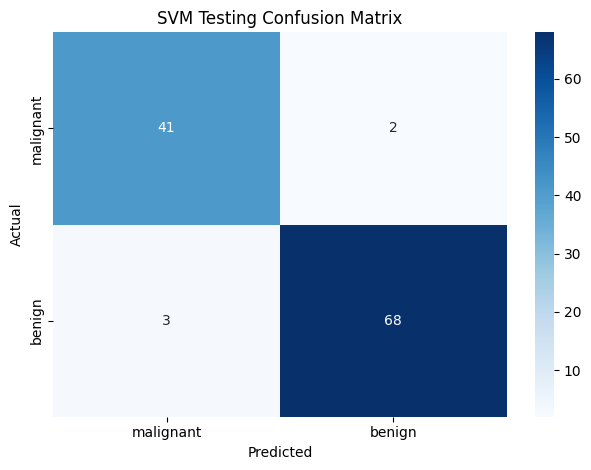

In [135]:
import seaborn as sns
conf_matrix_svm = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.title('SVM Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [136]:
#print both train and test accuracy
print(f"SVM Training Accuracy: {Svm_moel.score(X_train, y_train):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred):.3f}")

SVM Training Accuracy: 0.987
SVM Testing Accuracy: 0.956


# Random Forest

In [138]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Types of Un supervised Learning

**Unsupervised Learning** is about discovering hidden patterns with no predefined labels or answers.
Unsupervised Learning

**Main types of methods used in unsupervised learning:**

1. **Clustering**

Group similar data points together. Like organizing books by topic — but no one told you the topics in advance.

2. **Dimensionality Reduction**

Reduce the number of features while preserving patterns.
 It’s like summarizing a big book into key bullet points.

3. **Anomaly Detection**

Find what doesn't fit.
 Used in fraud detection, manufacturing faults, etc.


# Types of Clustering

**Types of Clustering**

 1. **Partition-Based Clustering (e.g., K-Means)**

You tell the algorithm how many clusters you want, and it divides the data into K groups by minimizing distance within each cluster.


*   You choose the number of clusters up front it works well when clusters are spherical and balanced.
*   Great for: Well-structured, large datasets.


 2. **Density-Based Clustering (e.g., DBSCAN)**

Instead of pre-defining how many clusters you want, this one groups data based on how closely packed the points are.


*   It finds clusters of any shape and can even detect noise/outliers.
*   Great for: Noisy data, arbitrary-shaped clusters, or when K is unknown.


 3. **Hierarchical Clustering**
This one builds a tree-like structure (called a dendrogram) by either merging or splitting clusters step by step.


*   You don’t need to pre-define K — you can “cut” the tree at any level to decide how many clusters you want.
*   Great for: Exploratory analysis and understanding relationships between clusters.



# Partition-Based Clustering (e.g., K-Means)

# KMeans

Is it just throwing your data into a K-Means algorithm, picking a number for K, and you're done, right?
But the real question is

**"How to choose the right value of K?"**

Here are 3 methods that helped to choose K more intelligently:


 1. **Elbow Method**

You plot the Within-Cluster-Sum-of-Squares (WCSS) for different values of K.

At some point, the curve starts to flatten , that’s your “elbow,” where adding more clusters doesn’t help much.

 2. **Silhouette Score**

This tells you how well-separated your clusters are.

It ranges from -1 to 1 — the higher, the better.

It basically asks: "Does each point belong more to its own cluster than to any other?"



 3. **Davies-Bouldin Index**

This one works the other way  lower is better.

It measures the average “similarity” between each cluster and its most similar one.



the KMeans class has many parameters that can be used, but we will be using these three:



*   init: Initialization method of the centroids.
Value will be: k-means++

*   k-means++: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence.
n_clusters: The number of clusters to form as well as the number of centroids to generate.



*   Value will be: 4 (since we have 4 centres)
n_init: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

*   Value will be: 12

In [43]:
k_means=KMeans(init="k-means++",n_clusters=4,n_init=12)

In [45]:
k_means.fit(X,y)

KMeans(n_clusters=4, n_init=12)

In [47]:
k_means_label=k_means.labels_
k_means_label

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [51]:
k_means_clutsrs_centers=k_means.cluster_centers_
k_means_clutsrs_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

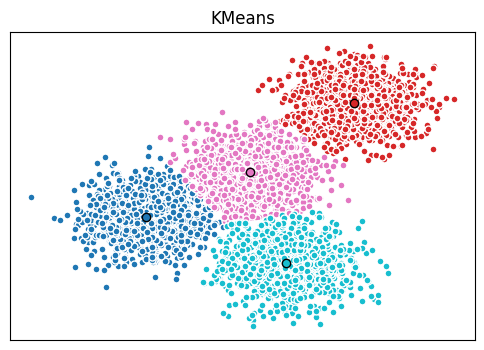

In [53]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_label))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_label == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_clutsrs_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [58]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [59]:
cust_df=cust_df.drop('Address',axis=1)

In [60]:
cust_df.isnull().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [61]:
cust_df['Defaulted']=cust_df['Defaulted'].fillna(cust_df['Defaulted'].mean())

In [62]:
scaler=StandardScaler()
cust_df_scaled=scaler.fit_transform(cust_df)

In [63]:
kmeans=KMeans(init="k-means++",n_clusters=3,n_init=12)
kmeans.fit(cust_df_scaled)

KMeans(n_clusters=3, n_init=12)

In [66]:
labels = kmeans.labels_
labels[:4]

array([0, 2, 1, 0], dtype=int32)

In [68]:
cluster_centers=kmeans.cluster_centers_
cluster_centers[:5]

array([[ 0.00348657, -0.12974476, -0.14305008, -0.11805949, -0.26982929,
        -0.35139849, -0.38321562, -0.51849945, -0.36253136],
       [-0.03002821, -0.4425802 ,  0.25286574, -0.69107458, -0.37070485,
         0.06173844, -0.03645105,  1.64737248,  0.63242382],
       [ 0.0255718 ,  1.04785453,  0.20579422,  1.32306244,  1.47463724,
         1.22252964,  1.46623597, -0.19078225,  0.53232648]])

In [70]:
# Assign cluster labels to the original dataframe
cust_df['cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_means = cust_df.groupby('cluster').mean()

# Print the means of each cluster
print(cluster_means)

# Map cluster indices to the descriptions
cluster_mapping = {
    0: 'LATE CAREER, AFFLUENT, AND EDUCATED',
    1: 'MID CAREER AND MIDDLE INCOME',
    2: 'EARLY CAREER AND LOW INCOME'
}


         Customer Id        Age       Edu  Years Employed      Income  \
cluster                                                                 
0         426.355513  33.986692  1.577947        7.766160   36.281369   
1         418.131868  31.472527  1.945055        3.884615   32.395604   
2         431.774648  43.450704  1.901408       17.528169  103.478873   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
cluster                                                     
0         0.830241    1.777067   0.054671         7.737072  
1         1.707989    2.954956   0.918336        14.418681  
2         4.174197    8.059282   0.185352        13.746479  

Cluster Characteristics:


# Elbow Method

In [72]:
cust_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio', 'cluster'],
      dtype='object')

In [78]:
#Elbow Method for selcting k of above dataset
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

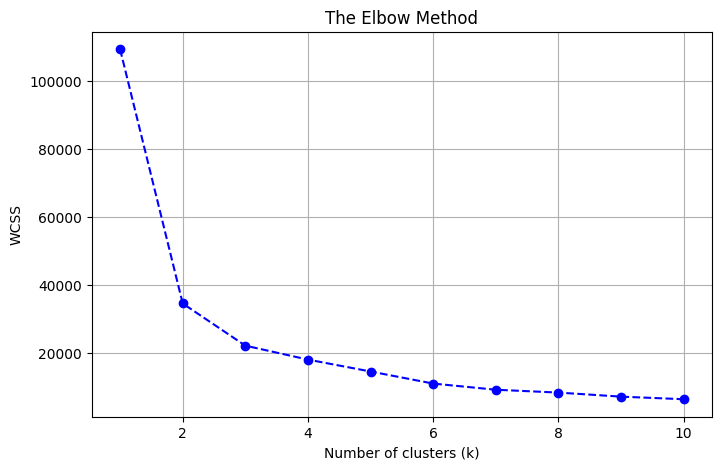

In [75]:
# Plotting the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# shilhoutee Score

In [83]:
# Store silhouette scores
silhouette_scores = []

# Try different k values
k_values = range(2, 11)  # Silhouette score is undefined for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)




[np.float64(0.6981588583757065), np.float64(0.595670734033931), np.float64(0.5857494678411528), np.float64(0.7222571625994793), np.float64(0.6458541918795841), np.float64(0.580260205213494), np.float64(0.5330867137101041), np.float64(0.4300706106204588), np.float64(0.36064482894786676)]


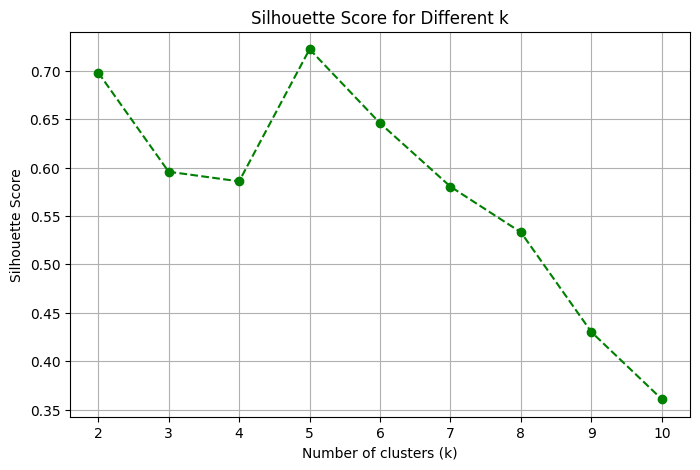

In [82]:
# Plotting the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


# Davies Bouldin Score

In [85]:
i# Store DBI scores
dbi_scores = []

# Try different k values
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)


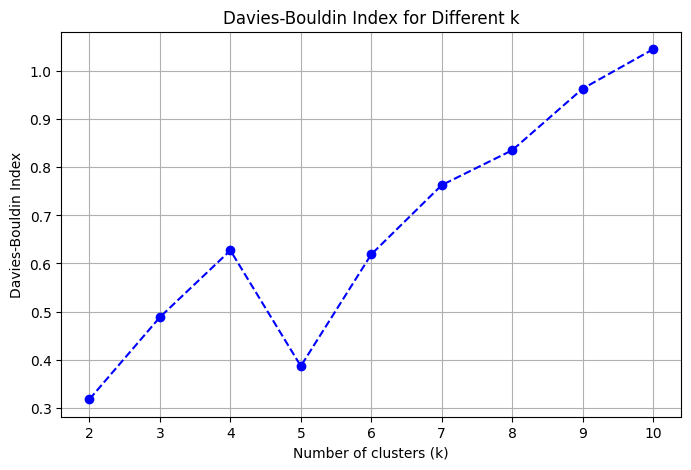

In [86]:
# Plotting the DBI Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, dbi_scores, marker='o', linestyle='--', color='blue')
plt.title('Davies-Bouldin Index for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Density Base Clustering


1.   DBSCAN (Density-Based Spatial Clustering)


It finds core samples in high-density areas and expands clusters from there. Anything in a low-density area? Marked as noise (which is actually super helpful).

2.  **HDBSCAN (Hierarchical DBSCAN)**

Think of it as the smarter cousin of DBSCAN.
It doesn’t just find clusters — it builds a hierarchy and then extracts the most stable ones.

# DBSCAN

In [87]:
# Step 1: Generate sample data )
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Step 2: Scale the data (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


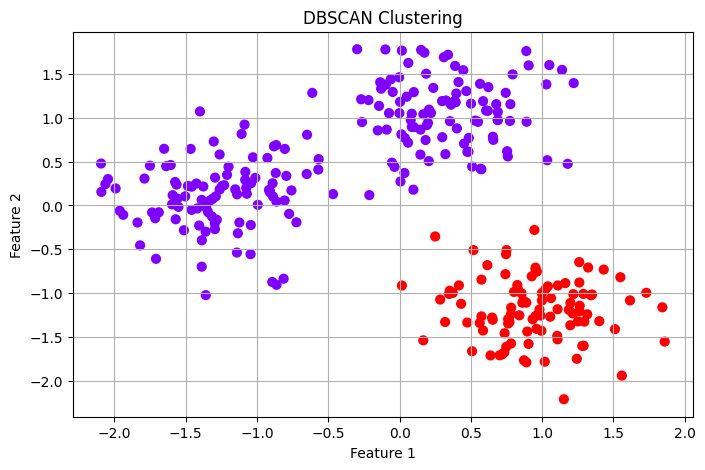

In [88]:
# Step 4: Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow', s=40)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# HDBSCAN

In [90]:
# Scale data
X_scaled = StandardScaler().fit_transform(X)

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
labels = clusterer.fit_predict(X_scaled)

# Number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Estimated number of clusters: {n_clusters}')



Estimated number of clusters: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/tmp/ipython-input-91-2193792220.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('rainbow', n_clusters)


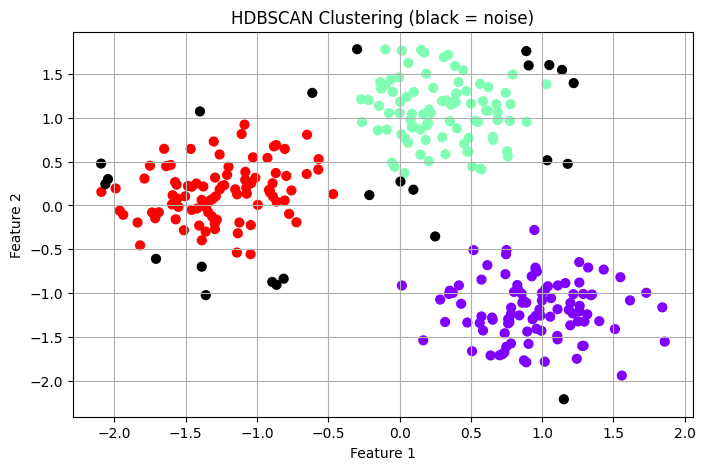

In [91]:
# Plot clusters, color noise as black
palette = plt.cm.get_cmap('rainbow', n_clusters)
colors = [palette(label) if label != -1 else (0, 0, 0, 1) for label in labels]

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, s=40)
plt.title('HDBSCAN Clustering (black = noise)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Herarichal Clustering


1.   Agglomerative Clustering (Bottom-Up Approach)

This is the most common type.
It starts by treating each data point as its own cluster. Then, step by step, it merges the closest pairs until everything becomes one big cluster.
2.    Divisive Clustering (Top-Down Approach)

Less common, but equally interesting.
This starts with one big cluster (the whole dataset) and keeps splitting it into smaller groups recursively.




# Agglomerative Clustering

In [103]:
# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [104]:
# Convert to DataFrame (optional, for visualization)
df = pd.DataFrame(X, columns=feature_names)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [105]:
#  Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_scaled)

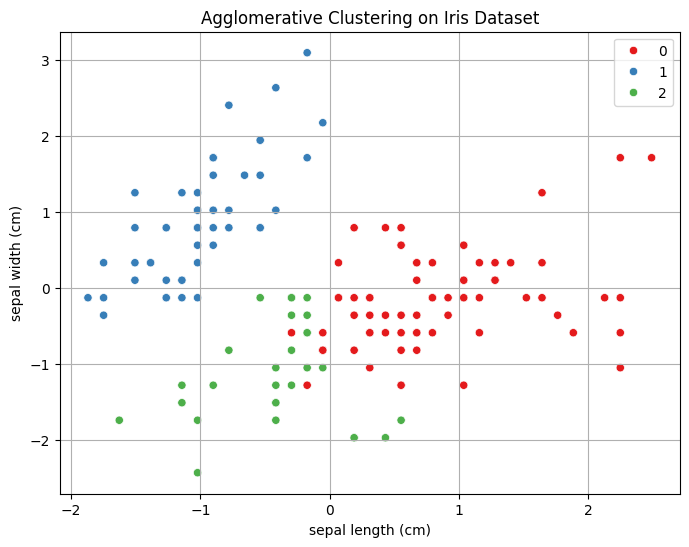

In [106]:
# Plot the results (2D projection using 2 features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set1')
plt.title("Agglomerative Clustering on Iris Dataset")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True)
plt.show()


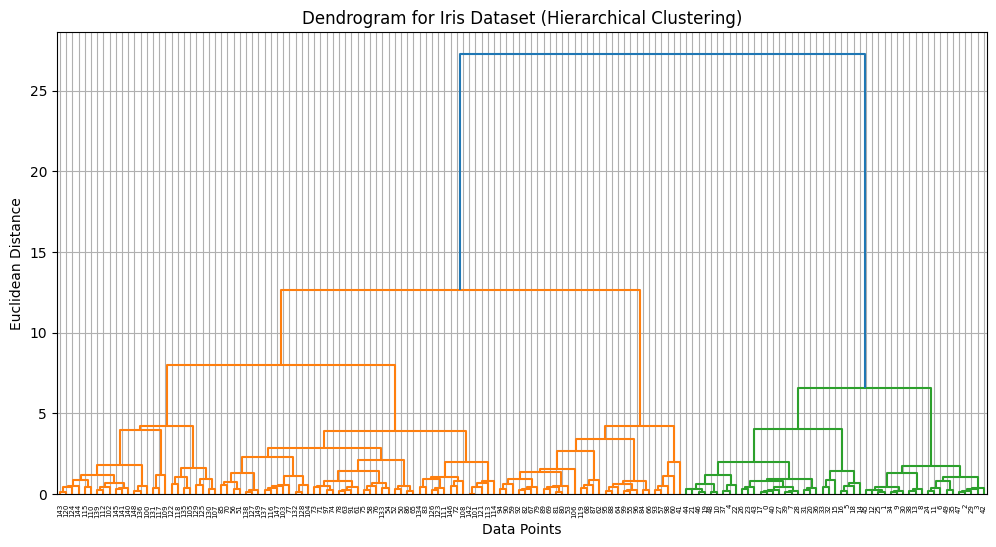

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage


# : Compute linkage matrix (used for dendrogram)
linked = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters

# : Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrogram for Iris Dataset (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


# Dimensionality Reduction

# PCA

In [87]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
pca=PCA(2)
X_pca = pca.fit_transform(X_scaled)

In [98]:
components = pca.components_
components

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

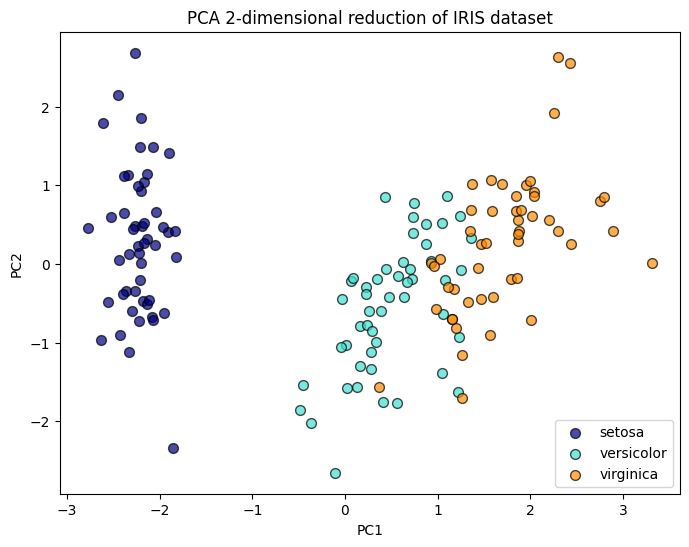

In [99]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(pca[y == i, 0], pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [102]:
100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000166)

# t-sne and umpa

In [103]:
# CLuster centers:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Cluster standard deviations:
cluster_std=[1,1,2,3.5]

# Make the blobs and return the data and the blob labels
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

In [104]:
# Create a DataFrame for Plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str) ,  opacity=0.7,  color_discrete_sequence=px.colors.qualitative.G10, title="3D Scatter Plot of Four Blobs")

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)  # Remove color bar, resize plot

fig.show()

In [105]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [107]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

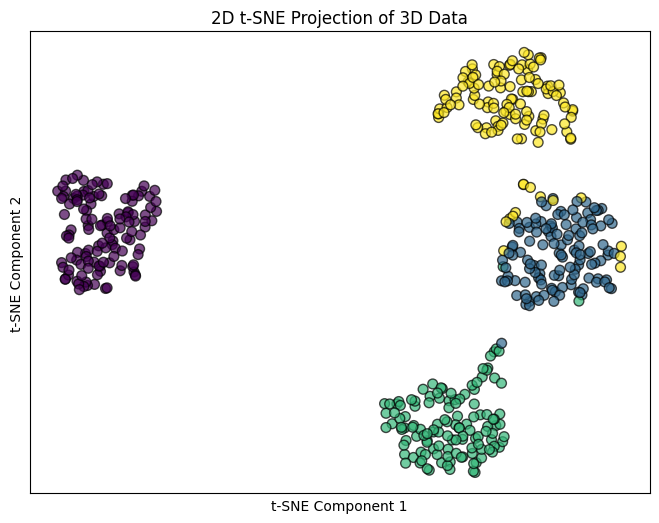

In [108]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()